In [1]:
import pandas as pd
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster as scp
import numpy as np
import pylab as pl
import urllib
import os
import sys
import geopandas
%pylab inline
import zipfile 
import geopandas as gp
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
urllib.request.urlretrieve(url, "zip_shapefile1.gz")
!unzip -d $PUIDATA/nyc_zip_shapefile1 zip_shapefile1.gz

Archive:  zip_shapefile1.gz
  inflating: /nfshome/vvt221/PUIdata/nyc_zip_shapefile1/ZIP_CODE_040114.shx  
  inflating: /nfshome/vvt221/PUIdata/nyc_zip_shapefile1/ZIP_CODE_040114.dbf  
  inflating: /nfshome/vvt221/PUIdata/nyc_zip_shapefile1/ZIP_CODE_040114.prj  
  inflating: /nfshome/vvt221/PUIdata/nyc_zip_shapefile1/ZIP_CODE_040114.sbn  
  inflating: /nfshome/vvt221/PUIdata/nyc_zip_shapefile1/ZIP_CODE_040114.sbx  
  inflating: /nfshome/vvt221/PUIdata/nyc_zip_shapefile1/ZIP_CODE_040114.shp  
  inflating: /nfshome/vvt221/PUIdata/nyc_zip_shapefile1/ZIP_CODE_040114.shp.xml  


In [8]:

for i in range(15):
    if i < 10:
        zip_url = 'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp0' + str(i) + 'totals.zip'
        urllib.request.urlretrieve(zip_url , os.getenv('PUIDATA') +  '/zbp0' + str(i) + 'totals.zip' )
       
    elif i>=10 and i<=14: 
        zip_url = 'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp' + str(i) + 'totals.zip'
        urllib.request.urlretrieve(zip_url , os.getenv('PUIDATA') + '/zbp' + str(i) + 'totals.zip' )
        


for i in range(94,100):
    zip_url = 'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp' + str(i) + 'totals.zip'
    urllib.request.urlretrieve(zip_url , os.getenv('PUIDATA')  + '/zbp' + str(i) + 'totals.zip' )
    
            
        


In [9]:


! unzip -d $PUIDATA $PUIDATA/'zbp*.zip'

Archive:  /nfshome/vvt221/PUIdata/zbp11totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp11totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp08totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp08totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp06totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp06totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp99totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp99totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp13totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp13totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp03totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp03totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp14totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp14totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp04totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp04totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp95totals.zip
  inflating: /nfshome/vvt221/PUIdata/zbp95totals.txt  

Archive:  /nfshome/vvt221/PUIdata/zbp96totals.

In [10]:
files = glob.glob(os.getenv('PUIDATA') + '/zbp*.txt')


In [11]:

nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/nyc_zip_shapefile1/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [12]:
nyczipsshp.reset_index(inplace=True)

In [13]:
nyczipsshp.ZIPCODE = nyczipsshp.ZIPCODE.astype(int)

In [14]:
nyczipsshp.set_index('ZIPCODE' , inplace=True)

In [15]:
sorted_file_names = sorted(files)

In [16]:
main_df = pd.DataFrame()
for file in sorted_file_names:
    
    
    df = pd.read_csv(file)
    df_columns = df.columns.tolist()
    if 'ZIP' in df_columns:
        df.rename(columns={'ZIP' : 'zip' , 'EST' : 'est'} , inplace=True)
        
        
    df = df[['zip' , 'est']]
    df.set_index('zip' , inplace=True)
    
    df.rename(columns={'ZIP' : 'zip' , 'est' : 'est' + file.split('/')[-1].split('.')[0]} , inplace=True)
    print(file)
    if file == os.getenv('PUIDATA') + '/zbp95totals.txt':
        continue
    main_df = pd.concat([main_df,df] , axis=1)


/nfshome/vvt221/PUIdata/zbp00totals.txt
/nfshome/vvt221/PUIdata/zbp01totals.txt
/nfshome/vvt221/PUIdata/zbp02totals.txt
/nfshome/vvt221/PUIdata/zbp03totals.txt
/nfshome/vvt221/PUIdata/zbp04totals.txt
/nfshome/vvt221/PUIdata/zbp05totals.txt
/nfshome/vvt221/PUIdata/zbp06totals.txt
/nfshome/vvt221/PUIdata/zbp07totals.txt
/nfshome/vvt221/PUIdata/zbp08totals.txt
/nfshome/vvt221/PUIdata/zbp09totals.txt
/nfshome/vvt221/PUIdata/zbp10totals.txt
/nfshome/vvt221/PUIdata/zbp11totals.txt
/nfshome/vvt221/PUIdata/zbp12totals.txt
/nfshome/vvt221/PUIdata/zbp13totals.txt
/nfshome/vvt221/PUIdata/zbp14totals.txt
/nfshome/vvt221/PUIdata/zbp94totals.txt
/nfshome/vvt221/PUIdata/zbp95totals.txt
/nfshome/vvt221/PUIdata/zbp96totals.txt
/nfshome/vvt221/PUIdata/zbp97totals.txt
/nfshome/vvt221/PUIdata/zbp98totals.txt
/nfshome/vvt221/PUIdata/zbp99totals.txt


In [17]:
ny_zips = nyczipsshp.reset_index()
ny_zips_list = ny_zips['ZIPCODE'].values.tolist()
len(ny_zips_list)

263

In [18]:
main_df1 = main_df.reset_index()

In [19]:
main_df1 = main_df1[main_df1['zip'].isin(ny_zips_list)]

In [20]:
main_df1.set_index('zip' ,inplace=True)

In [21]:
main_df1.shape

(245, 20)

In [22]:
df_95 = pd.read_csv(sorted_file_names[16],index_col='zip' ,usecols=['zip' ,'est'])

df_95.rename(columns={'est' : 'est' + sorted_file_names[16].split('/')[-1].split('.')[0]} , inplace=True)
df_95.head()

,estzbp95totals
zip,
501,2
1000,4
1001,439
1002,467
1003,10


In [45]:
all_year_data = pd.merge(main_df1,df_95,left_index=True , right_index=True)
all_year_data.dropna(inplace=True)

In [46]:


all_year_data_temporal = x[['estzbp95totals' ,'estzbp96totals' , 'estzbp97totals' , 'estzbp98totals' , 'estzbp99totals', 'estzbp00totals' , 'estzbp01totals','estzbp02totals' ,'estzbp03totals',
              'estzbp04totals' , 'estzbp05totals' , 'estzbp06totals' , 'estzbp07totals' , 'estzbp08totals' , 'estzbp09totals' , 'estzbp10totals' , 'estzbp11totals' , 'estzbp12totals' , 'estzbp13totals' , 'estzbp14totals'  ]]
all_year_data_temporal.shape

(230, 20)

In [47]:
vals = ((all_year_data_temporal.T - all_year_data_temporal.mean(1)) / all_year_data_temporal.std(1)).T
vals.dropna(inplace=True)

In [48]:
vals.mean(axis=1) 
vals.mean(axis=1).shape


(230,)

In [49]:
nc=5
km = KMeans(n_clusters=nc, random_state=444).fit(vals)


In [50]:
cluster_labels = pd.DataFrame(km.labels_)
cluster_labels.rename(columns={0 :'clusterlabel'},inplace=True)

In [51]:
km.cluster_centers_.shape

(5, 20)

In [52]:
knn_df = vals.reset_index()

In [53]:
knn_df = pd.concat([knn_df,cluster_labels],axis=1)
knn_df.set_index('zip' , inplace=True)

In [54]:
knn_df_cl1 = knn_df[knn_df['clusterlabel']== 0]
knn_df_cl1.drop('clusterlabel',axis=1,inplace=1)

knn_df_cl2 = knn_df[knn_df['clusterlabel']== 1]
knn_df_cl2.drop('clusterlabel',axis=1,inplace=1)

knn_df_cl3 = knn_df[knn_df['clusterlabel']== 2]
knn_df_cl3.drop('clusterlabel',axis=1,inplace=1)

knn_df_cl4 = knn_df[knn_df['clusterlabel']== 3]
knn_df_cl4.drop('clusterlabel',axis=1,inplace=1)

knn_df_cl5 = knn_df[knn_df['clusterlabel']== 3]
knn_df_cl5.drop('clusterlabel',axis=1,inplace=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [55]:
nyczipsshp_plot = gp.read_file(os.getenv("PUIDATA") + "/nyc_zip_shapefile/ZIP_CODE_040114.shp")
nyczipsshp_plot.ZIPCODE = nyczipsshp_plot.ZIPCODE.astype(int)
nyczipsshp_plot.set_index('ZIPCODE' , inplace=True)

In [56]:
nyczipsshp_plot = nyczipsshp_plot.merge(knn_df,left_index=True,right_index=True)

(905410.75604293647,
 1075212.5382562785,
 112386.35181947275,
 280345.45402395498)

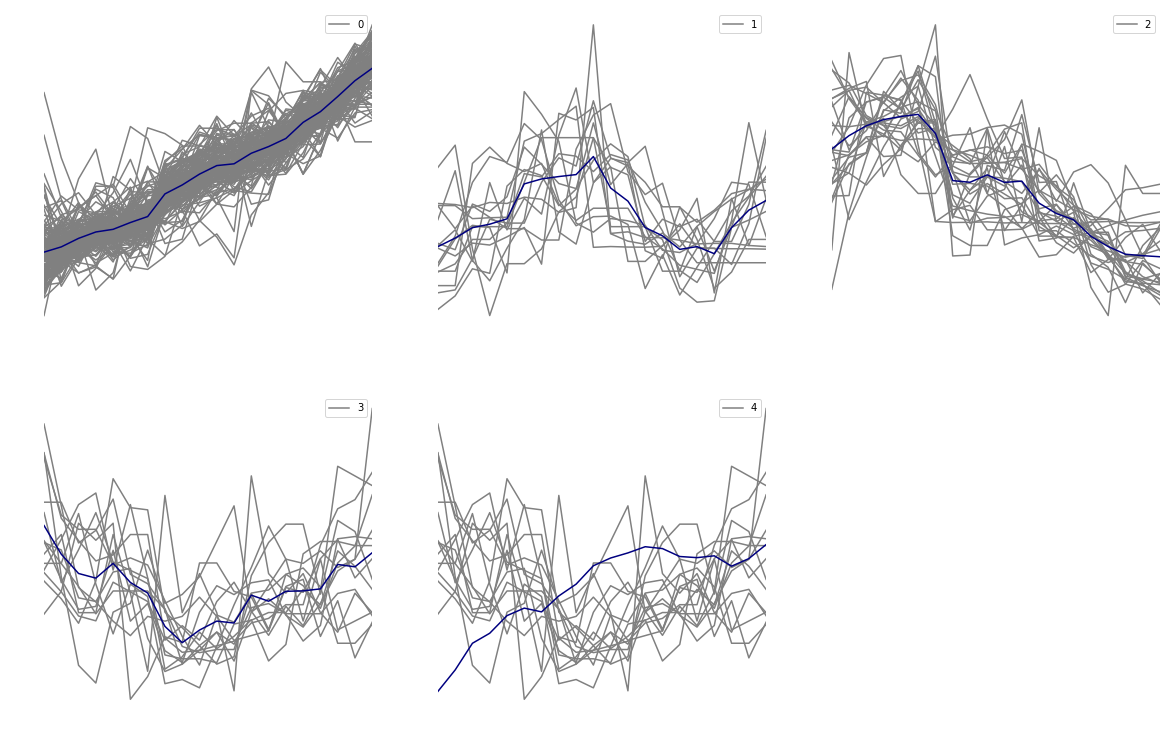

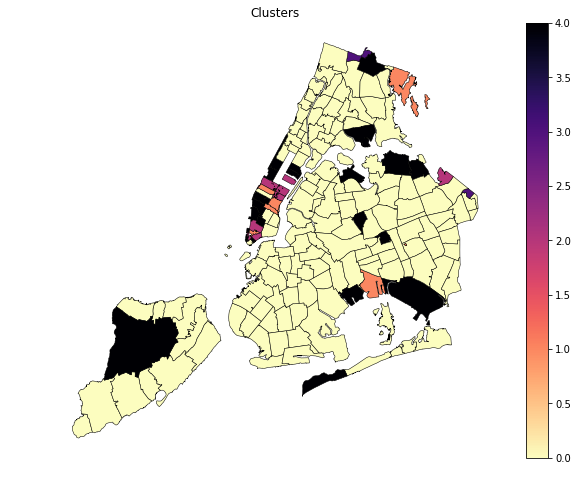

In [57]:
fig = pl.figure(figsize=(20,20))

ax1 = fig.add_subplot(331)
knn_df_cl1.T.plot(ax=ax1,color='grey',legend=False)
pl.plot(km.cluster_centers_[0],color='navy')
pl.axis('off')
pl.legend([0])
ax2 = fig.add_subplot(332)
knn_df_cl2.T.plot(ax=ax2,color='grey',label='False')
pl.plot(km.cluster_centers_[1],color='navy',label=1)
pl.axis('off')
pl.legend([1])
ax3 = fig.add_subplot(333)
knn_df_cl3.T.plot(ax=ax3,color='grey',legend=False)
pl.plot(km.cluster_centers_[2],color='navy')
pl.axis('off')
pl.legend([2])

ax4 = fig.add_subplot(334)
knn_df_cl4.T.plot(ax=ax4,color='grey',legend=False)
pl.plot(km.cluster_centers_[3],color='navy')
pl.axis('off')
pl.legend([3])

ax5 = fig.add_subplot(335)
knn_df_cl5.T.plot(ax=ax5,color='grey',legend=False)
pl.plot(km.cluster_centers_[4],color='navy')
pl.axis('off')
pl.legend([4])


#ax6 = fig.add_subplot(338)
#nyczipsshp_plot.plot(ax=ax6, column='clusterlabel',cmap='Blues',figsize=(20,20),legend=True,label='clusters')
#pl.axis('off')




fig,ax = pl.subplots(figsize=(10,8))
nyczipsshp_plot.plot(ax=ax, column='clusterlabel',cmap='magma_r',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5)
#pl.colorbar(ticks=range(5), label=[0,1,2,3,4])
ax.legend()
ax.set_title('Clusters')
#cb = pl.colorbar(ax=ax, orientation='horizontal')  
pl.axis('off')

#### Figure 1: Plot identifying the time series clusters and the corresponding clusters onto the zipcodes of New York City


In [58]:
agc = AgglomerativeClustering(n_clusters=5, linkage='average').fit(vals)
labelsag = agc.labels_
centroidsag = np.zeros((nc, vals.shape[1]))

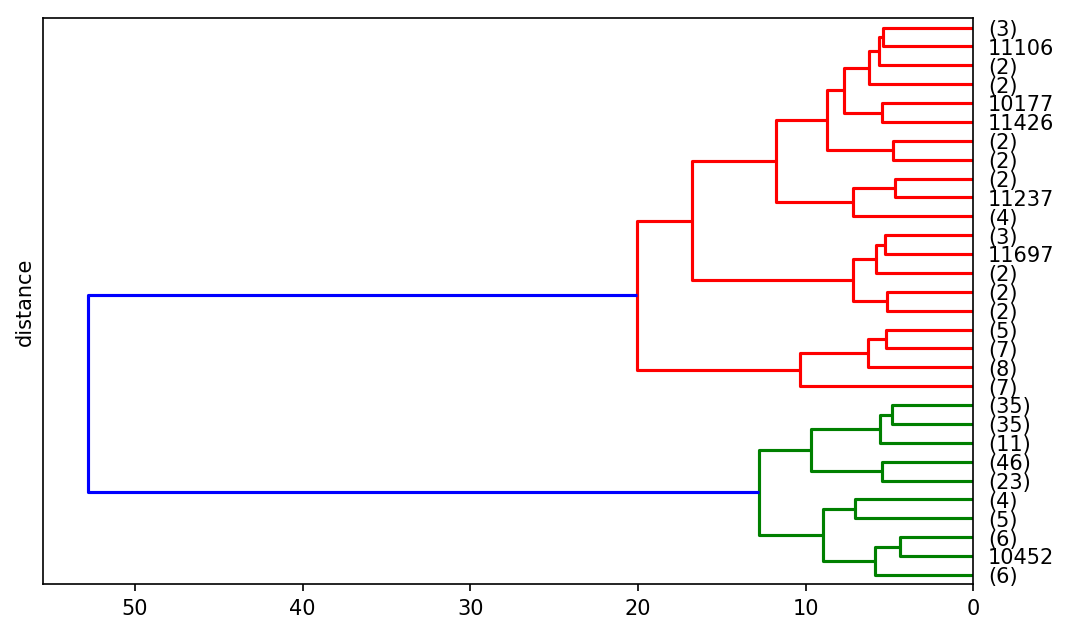

In [59]:
fig = pl.figure(figsize=(8,5), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = ny_zips_list,
                               leaf_rotation=0.,  # rotates the x axis labels
                               leaf_font_size=10.,
                               orientation='left',
                               truncate_mode='lastp')  # font size for the x axis labels)


#### Figure 2: Dendogram showing clusters formed using agglomerative hierarchical clustering. The axis on the right lists the cluster number( meaning it contains multiple zipcodes) and standalone zipcodes are ones which have not yet been assigned a cluster. This has been due to improve the visibility of the clusters.

In [60]:
nyczipsshp_plot_agc = gp.read_file(os.getenv("PUIDATA") + "/nyc_zip_shapefile/ZIP_CODE_040114.shp")
nyczipsshp_plot_agc.ZIPCODE = nyczipsshp_plot_agc.ZIPCODE.astype(int)
nyczipsshp_plot_agc.set_index('ZIPCODE' , inplace=True)

In [61]:
agc_clusters = vals.reset_index()


In [62]:
cluster_labels_agc = pd.DataFrame(agc.labels_)
cluster_labels_agc.rename(columns={0 :'clusterlabel'},inplace=True)

In [63]:
agc_clusters = pd.concat([agc_clusters,cluster_labels_agc],axis=1)
agc_clusters.set_index('zip' , inplace=True)

In [64]:
nyczipsshp_plot_agc = nyczipsshp_plot_agc.merge(agc_clusters,left_index=True,right_index=True)

(905410.75604293647,
 1075212.5382562785,
 112386.35181947275,
 280345.45402395498)

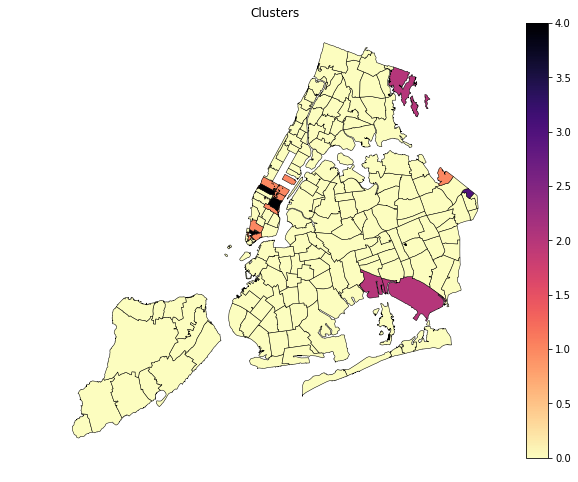

In [65]:

fig,ax = pl.subplots(figsize=(10,8))

nyczipsshp_plot_agc.plot(ax=ax, column='clusterlabel',cmap='magma_r',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5)
#pl.colorbar(ticks=range(5), label=[0,1,2,3,4])

ax.legend()
ax.set_title('Clusters')
#cb = pl.colorbar(ax=ax, orientation='horizontal')  
pl.axis('off')

#### Figure 3: Plot showing location of the clusters identified using agglomerative hierarchical clustering.  The clusters dont differ from those identified using the Kmeans clustering techniques except for some pockets

(905410.75604293658,
 1075212.5382562787,
 112386.35181947277,
 280345.45402395498)

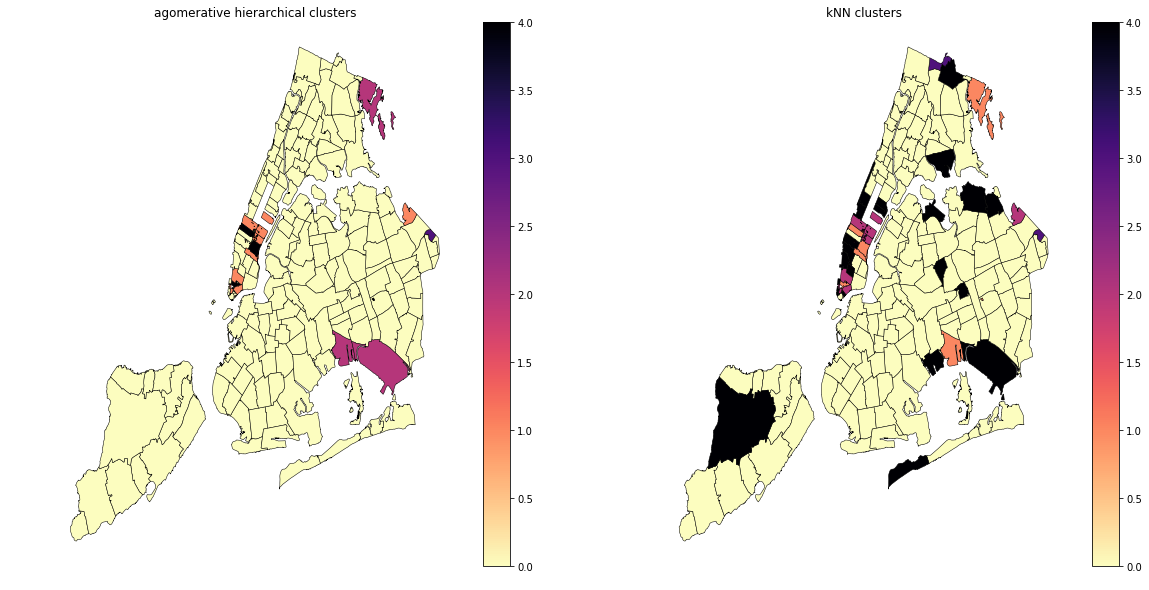

In [66]:
fig = pl.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
nyczipsshp_plot_agc.plot(ax=ax1, column='clusterlabel',cmap='magma_r',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5)
pl.axis('off')
ax1.set_title('agomerative hierarchical clusters')


ax2 = fig.add_subplot(122)
nyczipsshp_plot.plot(ax=ax2, column='clusterlabel',cmap='magma_r',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5)
ax2.set_title('kNN clusters')
pl.axis('off')

### Figure 4: Plot comparing the clusters identified by the agglomerative hierarchical clustering and the k nearest neighbors clustering. While most of the clusters identified are mostly the same, the clusters which are recognised by K means but not by agglomerative clustering may be due to the difference in their clustering approach, ie top down and bottom up manner.